<a href="https://colab.research.google.com/github/luckysouthchou/pytorch_udemy/blob/master/Perception.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip3 install torch

In [0]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import torch.nn as nn


In [0]:
from sklearn import datasets


In [0]:
n_pts = 500


# y is label, and x is datapoints
x, y = datasets.make_circles(n_samples= n_pts, random_state=123, noise=0.1, factor=0.2)
x_data = torch.Tensor(x)
y_data = torch.Tensor(y.reshape(500, 1))
#reshape it has two dimension, 100 rows and1 columns

In [0]:
def scatter_plot():
  plt.scatter(x[y==0,0], x[y==0, 1])
  plt.scatter(x[y==1, 0], x[y==1, 1])

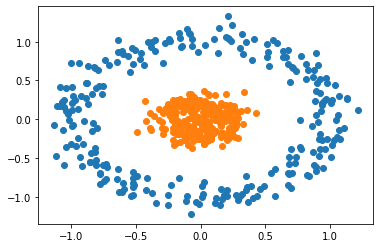

In [6]:
scatter_plot()

In [0]:
class Model(nn.Module):
  def __init__(self, input_size,H1, output_size):
    super().__init__()
    self.linear = nn.Linear(input_size, H1)
    self.linear2 = nn.Linear(H1, output_size)
  def forward(self, x):
    x = torch.sigmoid(self.linear(x))
    x = torch.sigmoid(self.linear2(x))
    return x
    return pred
    #sigmoid function: convert value to probability
  def predict(self, x):
    pred =  self.forward(x)
    if pred >= 0.5:
      return 1
    else:
      return 0


In [8]:
torch.manual_seed(2)
model = Model(2, 4, 1)
print(list(model.parameters()))

[Parameter containing:
tensor([[ 0.1622, -0.1683],
        [ 0.1939, -0.0361],
        [ 0.3021,  0.1683],
        [-0.0813, -0.5717]], requires_grad=True), Parameter containing:
tensor([ 0.1614, -0.6260,  0.0929,  0.0470], requires_grad=True), Parameter containing:
tensor([[-0.1099,  0.4088,  0.0334,  0.2073]], requires_grad=True), Parameter containing:
tensor([0.2116], requires_grad=True)]


In [0]:
#[w, b] = model.parameters()

In [0]:
#w1, w2 = w.view(2)


In [0]:
def get_params():
  return(w1.item(), w2.item(), b[0].item())

In [0]:
def plot_fit(title):
  plt.title = title 
  #0 = w1 * x1 + w2 * X2 + b
  w1, w2, b1 = get_params()
  x1 = np.array([-2.0, 2.0])
  x2 = (w1 * x1 + b1) / -w2
  plt.plot(x1, x2, 'r')
  scatter_plot()

In [0]:
#plot_fit('Initial Model')

In [0]:
criterion = nn.BCELoss()
#binary cross entropy loss

In [0]:
optimizer = torch.optim.Adam(model.parameters(), lr = 0.1)
#adaptive optimizer
losses = []

In [0]:
epochs = 1000
for i in range(epochs):
  #convert numpy array to tensor,using x_date rather than x
  y_pred = model.forward(x_data)
  loss = criterion(y_pred, y_data)
  #print('epoch',i,"loss",loss.item())
  #using item to get tensor dataor, using .view()
  losses.append(loss.item())
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()


Text(0, 0.5, 'epoch')

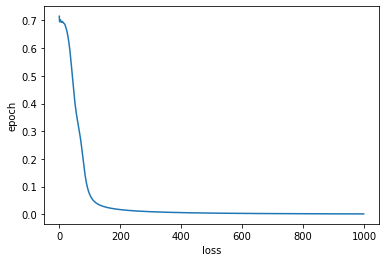

In [16]:
plt.plot(range(epochs), losses)
plt.xlabel("loss")
plt.ylabel('epoch')

In [17]:
plot_fit("training model")

NameError: ignored

In [0]:
#model testing

point1 = torch.Tensor([1.0, -1.0])
point2 = torch.Tensor([-1.0, 1.0])
plt.plot(point1.numpy()[0], point1.numpy()[1], 'ro')
plt.plot(point2.numpy()[0], point2.numpy()[1], 'ko')
print('red point positive probability is equal to= {}'.format(model.forward(point1).item()))
print('black point positive probability is equal to = {}'.format(model.forward(point2).item()))
print('red point in class {}'.format(model.predict(point1)))
print('black point in class {}'.format(model.predict(point2)))
plot_fit('Trained Model')